In [49]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.special import expit
# plt.style.use('seaborn-whitegrid')
file = open('ex2data1.txt')
data= np.loadtxt(file, delimiter= ",")

<b>Loading Data</b>

In [5]:
print(data.shape)
# y=0 means student is not admitted in univ. x0 and x1 are scores of 2 exams
m= len(data)
x=np.array(data[:,[0,1]]).reshape(m,2)
y=np.array(data[:,2]).reshape(m,1)
print(x.shape,y.shape)

(100, 3)
(100, 2) (100, 1)


<b>Visualizing Data</b>

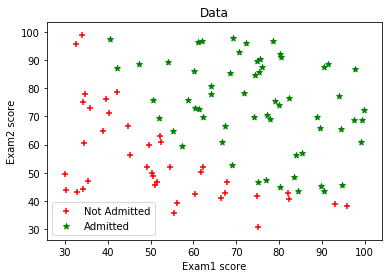

In [173]:
for x1,x2,y1 in data:
    if y1 == 0:
        neg=plt.scatter(x1,x2, marker= '+', color='red' , label='Not Admitted')
    else:
        pos=plt.scatter(x1,x2, marker= '*' , color='green' ,label='Admitted')
plt.legend(handles=[neg,pos])
plt.title("Data")
plt.xlabel("Exam1 score")
plt.ylabel("Exam2 score")
plt.show()


<b>Generating Feature Matrix and initial theta </b>

In [66]:
init_theta= np.zeros((x.shape[1]+1,1))
n=np.ones((m,1))
X= np.c_[n, x]
print(X.shape)
print(init_theta.shape)
print(y.shape)
print(expit(X.dot(init_theta)).shape)

(100, 3)
(3, 1)
(100, 1)
(100, 1)


In [151]:
def h(X, theta):
    return expit(X.dot(theta) )             # shape = 100:1

def CostFunc(theta, X, y, lambd=0):
    theta=theta.reshape(X.shape[1],1)      # for (3,) to (3,1)
    J= (-1/m) *( (np.log(h(X,theta))).T.dot(y) + (np.log(1-h(X,theta))).T.dot(1-y))
    regularised=((lambd/(2*m))*np.sum(np.dot(theta[1:].T, theta[1:])))
    return (J[0]+regularised)
    
def Gradient(X,y,theta):
    return (1/m)*X.T.dot(h(X,theta)-y)

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(CostFunc, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

In [152]:
Rate=0.01
print("Cost at theta=0: " ,CostFunc(init_theta,X,y,lambd=1000))
theta, mincost= optimizeTheta(init_theta, X, y)


Cost at theta=0:  [0.69314718]
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [153]:
print("theta : ", theta)
print("Minimized Cost : ", mincost)
print("Same cost through Cost Function : ",CostFunc(theta, X, y))

theta :  [-25.16130062   0.20623142   0.20147143]
Minimized Cost :  0.20349770159021513
Same cost through Cost Function :  [0.2034977]


<b>Finding Hypothesis function and Decision boundary <

In [154]:
print("hypothesis : Hq(X) = %f  +  %f*X1  + %f*X2" % (theta[0], theta[1], theta[2]))

hypothesis : Hq(X) = -25.161301  +  0.206231*X1  + 0.201471*X2


30.05882244669796


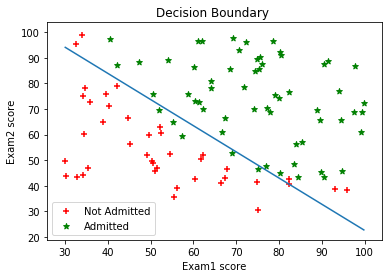

In [169]:
# eq of line : y= (-1/theta2)*(theta0 + theta1*x)

xs= np.array([np.min(X[:,1]), np.max(X[:,1])])
ys= (-1./theta[2])*(theta[0]+ theta[1]*xs)
plt.plot(xs,ys)

for x1,x2,y1 in data:
    if y1 == 0:
        neg=plt.scatter(x1,x2, marker= '+', color='red' , label='Not Admitted')
    else:
        pos=plt.scatter(x1,x2, marker= '*' , color='green' ,label='Admitted')
plt.legend(handles=[neg,pos])
plt.title("Decision Boundary ")
plt.xlabel("Exam1 score")
plt.ylabel("Exam2 score")

print(min(xs))
